# Manual use of Optimus Climas
To run your own experiments you can also use the Code Base of Optimus Climas. You can run your own simulations and visualize them with the tools given in  KlimaUi/climatesimulationAI/other/visuals .

For making your own predictions you can use the  simulation.pred(...)  in  KlimaUi/climatesimulationAI/simulation . With this function you can enable/disable a lot of features, like if and which tipping points to consider for the simulation. For further documentation see  KlimaUi/climatesimulationAI/simulation.py .

Optimus Climas is optimised for positive emission scenarios (meaning ONLY increase in emissions). There are trained models for negative emission scenarios, BUT they are not fully optimised as this was not the focus of the study. For negative emission scenarios the model FrederikeSSTGADFGRIBhist101.h5 is suggested with the additional parameters for simulation.pred(...):
- newuse = True
- oldmodeluse = False

The suggested and tested models are  FrederikeSSTGADFGRIBhist108.h5  (for temperature simulation) and  kalaSST104.h5  (for sea level simulation)! FOR ALL OTHER MODELS REALISTIC RESULTS CAN'T BE GUARANTEED!

ATTENTION, some parameters of simulation.pred() are only for developing purposes! Please do not change manually at all the following parameters:
   - numberofghgs: amount of ghgs used for the simulation (optional)
   - numberoffeatures: amount of features (input parameters) used for the simulation (optional)
   - gafsize: size of the GAF matrices (optional)
   - methodSST: whether to use Spatial-Spectral Transformer/mVit, boolean (default true)
   - methodConv: whether to use CNN, boolean (default false),  EXPERIMENTAL!,
      ESPECIALLY WITH TIPPING POINTS! ONLY WORKS WITH MODELS TRAINED FOR CNN ARCHITECTURE!!!


ATTENTION, a lot of parameters of simulation.pred() are dependent on the model version you use! DO NOT modify the following parameters besides the parameter sets given for the different models:
   - outputsize: size of the output (temperature grid) (optional)
   - modelname: filename of the used neural network for the temperature simulation (optional)
   - actfactor: factor sigmoid is multiplied by in the pre-activation, float (default 0.8,  determined experimentally)
   - modelnamesea: filename of the used neural network for the sea level simulation (optional)
   - nccmip6: if grid of cmip6 imported in a netCDF format is used, boolean (default true)
   - with_oldmodel: whether to use multiple model versions (results in more accurate result), boolean (default true)
   - new: whether to use a certain model architecture (for temperature model), boolean
   - awi: if grid format of the AWI is used, boolean (default false)
   - newsea: whether to use a certain model architecture (for sea level model), boolean

YOU CAN modify these parameters:
- ghgchanges: changes in ghgs (characteristic of the scenario), list of integers, shape (ghg, co2, ch4, bc, so2, oc)
- onlyindata: whether to only calculate (and return) the gaf matrices (input for the model), boolean (default false)
- onlyemidata: whether to only calculate (and return) the future emission developments, boolean (default false)
- withtippingpoints: whether to consider tipping points in the simulation, boolean (default false)
- predsea: whether to simulate global mean sea level, boolean (default false)
- anaerobe: whether anaerobe conditions for the boreal permafrost collapse are to be assumed, boolean (default true)
- rainforestused: whether to take the tipping point die-off of the amazonas rainforest into account, boolean (default true)
- wais: whether to consider the tipping point collapse of the west-antarctic ice sheet
- partly_anaerobe: whether certain parts are to be assumed under anaerobe conditions
 for the boreal permafrost collapse, boolean (default false),  HAS EFFECT ONLY IF anaerobe=true
- partanaeorbe: how many is to be assumed anaerobe of the boreal permafrost when collapsing, in %, float, HAS EFFECT ONLY IF partly_anaerobe=true!
- withpermafrost: whether to take the tipping point collapse of the boreal permafrost into account, boolean (default true)




# Example prediction with the suggested models
Here an example is shown with the suggested models and the right parameters for them. You can modify the parameters not named above to make your own experiments.

In [1]:
import matplotlib.pyplot as plt
import KlimaUi.climatesimulationAI.simulation as simulation
import KlimaUi.climatesimulationAI.other.visuals as visuals

In [2]:
modelname = "FrederikeSSTGADFGRIBhist108.h5"
modelnamesea = 'kalaSST104.h5'
ghgchangesssp5 = [200, 200, 50, -60, -60, -43]
newuse = False
oldmodeluse = True
newsea = True
# example prediction in scenario SSP5-8.5 with all tipping points considered and fully anaerobe conditions in case of a collapse of the boreal permafrost
predf = simulation.pred(ghgchanges=ghgchangesssp5, start=2014, end=2114, modelname=modelname,
                                 withtippingpoints=True, predsea=True,modelnamesea=modelnamesea,
                                 anaerobe=True, rainforestused=True,
                                 partly_anaerobe=False, partanaeorbe=None, new=newuse,
                                 with_oldmodel=oldmodeluse, awi=False, wais=True, newsea=newsea)

1/1 [==============================] - 3s 3s/step
tipping point simulation starting
Amazonas Rainforest dieback was triggerd in year 2073
1/1 [==============================] - 1s 626ms/step
WAIS was triggerd in year 2034
endyear: 2039
duration: 5
endyear: 25
1/1 [==============================] - 13s 13s/step


You will get an output where predf[0] contains the results of the temperature simulation and predf[1] contains the results of the sea level simulation. You can plot the results of the sea level simulation as they are (due to them being global mean values) with matplotlib. For the results of the temperature simulation you can either plot the temperature development of one grid point (or the global mean) with matplotlib or create a heatmap of one year using KlimaUi/climatesimulationAI/other/visuals.visualizegridtemperature(...).

### Plot global mean sea level rise

Text(0, 0.5, 'rise in mm since 1880')

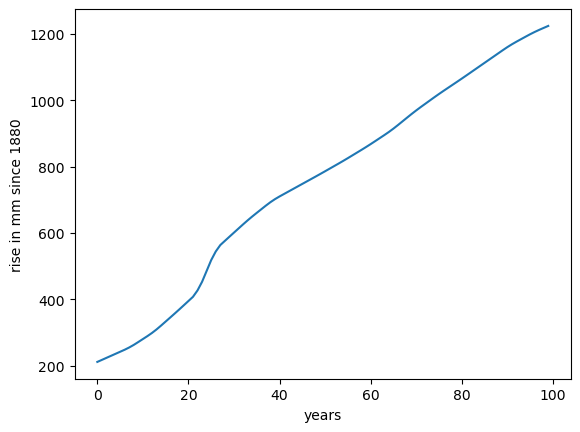

In [3]:
plt.plot(predf[1])
plt.xlabel("years")
plt.ylabel("rise in mm since 1880")

### Plot global mean temperature

Text(0, 0.5, 'temperature in °C')

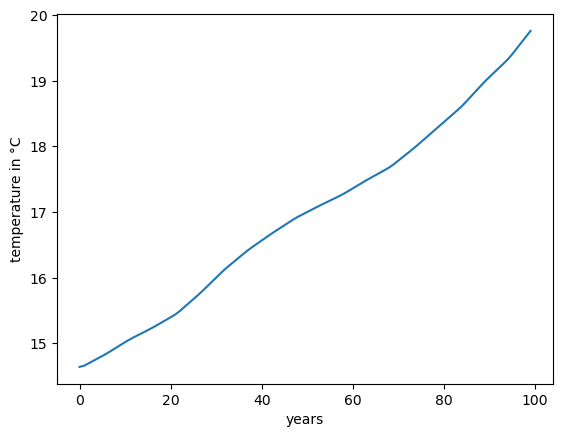

In [4]:
i = predf[0][0,:].size - 1 # for global mean temperature
plt.plot(predf[0][:,i])
plt.xlabel("years")
plt.ylabel("temperature in °C")

### Display heatmap

plotting
heatmap saved
(5250, 2400, 3)
heatmap cropped
2025-04-17 02:21:20.932208


<Figure size 640x480 with 0 Axes>

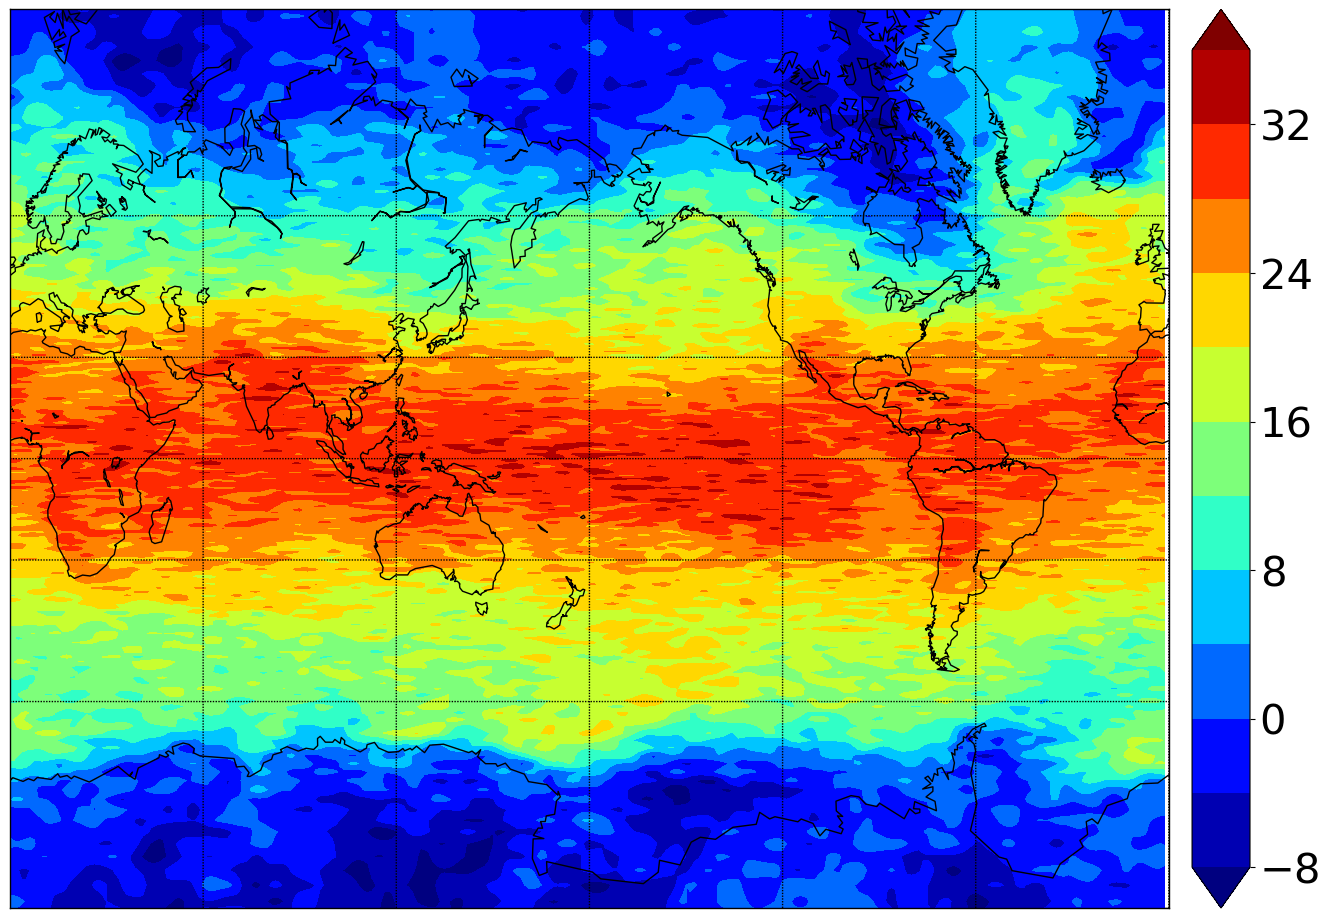

In [5]:
outputsize = predf[0][0,:].size - 1
i = 99 # year to display (start year = 0)
fig = plt.figure()
visuals.visualizegridtemperature(predf[0][:, :outputsize], last=False, first=False,i=i,fig=fig, nominmax=True)